In [1]:
!pip install yfinance
import yfinance as yf

In [2]:
import numpy as np

In [3]:
df = yf.download(['BRITANNIA.BO', 'EICHERMOT.NS','BAJFINANCE.NS','BERGEPAINT.NS','HAVELLS.NS','PIDILITIND.NS','HDFCBANK.NS','ADANIPOWER.NS','TITAN.NS','HCLTECH.NS'],start="2012-04-02",end="2022-04-13")


[*********************100%***********************]  10 of 10 completed


In [4]:
print(df)

               Adj Close                                           \
           ADANIPOWER.NS BAJFINANCE.NS BERGEPAINT.NS BRITANNIA.BO   
Date                                                                
2012-04-02     68.599998     76.982635     35.655056   251.028656   
2012-04-03     70.500000     79.694145     38.158039   254.931885   
2012-04-04     72.500000     80.722481     38.655312   254.931885   
2012-04-09     71.550003     79.827873     38.290646   255.124924   
2012-04-10     72.599998     80.053833     37.428688   253.580826   
...                  ...           ...           ...          ...   
2022-04-06    244.750000   7320.296387    723.653931  3178.652344   
2022-04-07    232.550003   7263.751953    720.667114  3187.750244   
2022-04-08    220.949997   7339.875000    731.369812  3240.645508   
2022-04-11    231.600006   7310.033203    728.880798  3240.936035   
2022-04-12    230.800003   7248.108887    719.123901  3237.596680   

                                 

In [5]:
df = np.log(1+ df['Adj Close'].pct_change())

In [6]:
print(df)

            ADANIPOWER.NS  BAJFINANCE.NS  BERGEPAINT.NS  BRITANNIA.BO  \
Date                                                                    
2012-04-02            NaN            NaN            NaN           NaN   
2012-04-03       0.027320       0.034616       0.067845      0.015429   
2012-04-04       0.027974       0.012821       0.012948      0.000000   
2012-04-09      -0.013190      -0.011144      -0.009479      0.000757   
2012-04-10       0.014568       0.002827      -0.022768     -0.006071   
...                   ...            ...            ...           ...   
2022-04-06       0.048770      -0.005633       0.003998     -0.005315   
2022-04-07      -0.051132      -0.007754      -0.004136      0.002858   
2022-04-08      -0.051169       0.010425       0.014742      0.016457   
2022-04-11       0.047075      -0.004074      -0.003409      0.000090   
2022-04-12      -0.003460      -0.008507      -0.013477     -0.001031   

            EICHERMOT.NS  HAVELLS.NS  HCLTECH.NS  

In [7]:
df

,ADANIPOWER.NS,BAJFINANCE.NS,BERGEPAINT.NS,BRITANNIA.BO,EICHERMOT.NS,HAVELLS.NS,HCLTECH.NS,HDFCBANK.NS,PIDILITIND.NS,TITAN.NS
Date,,,,,,,,,,
2012-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-04-03,0.027320,0.034616,0.067845,0.015429,0.011336,-0.011486,0.008245,0.003495,-0.032993,0.019980
2012-04-04,0.027974,0.012821,0.012948,0.000000,0.029297,-0.015927,0.007196,-0.006908,-0.011749,0.006238
2012-04-09,-0.013190,-0.011144,-0.009479,0.000757,-0.024588,-0.005973,-0.021344,-0.009158,0.026022,-0.027249
2012-04-10,0.014568,0.002827,-0.022768,-0.006071,0.014111,0.007698,-0.014758,0.005924,0.002065,0.005140
...,...,...,...,...,...,...,...,...,...,...
2022-04-06,0.048770,-0.005633,0.003998,-0.005315,-0.005026,-0.005417,-0.021092,-0.036343,0.008695,-0.003596
2022-04-07,-0.051132,-0.007754,-0.004136,0.002858,0.003038,-0.002119,0.002389,-0.022233,-0.014514,-0.032693
2022-04-08,-0.051169,0.010425,0.014742,0.016457,0.006597,0.014898,-0.006799,-0.001385,0.012773,0.020772


In [8]:
df.mean()


ADANIPOWER.NS    0.000491
BAJFINANCE.NS    0.001839
BERGEPAINT.NS    0.001216
BRITANNIA.BO     0.001035
EICHERMOT.NS     0.001057
HAVELLS.NS       0.000997
HCLTECH.NS       0.000962
HDFCBANK.NS      0.000728
PIDILITIND.NS    0.001089
TITAN.NS         0.000968
dtype: float64

In [9]:
cov= df.cov()

In [10]:
def portfolioreturn(weights):
    return np.dot(df.mean(),weights)

In [11]:
def portfoliostd(weights):
    return (np.dot(np.dot(cov,weights),weights))**(1/2)*np.sqrt(250)


In [12]:
def weightscreator(df):
    rand=np.random.random(len(df.columns))
    rand/= rand.sum() 
    return rand


In [43]:
returns = []
stds = []
w = []

for i in range(10000):
    weights = weightscreator(df)
    returns.append(portfolioreturn(weights))
    stds.append(portfoliostd(weights))
    w.append(weights)   

In [44]:
import pandas as pd
data = {"Returns": returns, "Volatility":stds}
portfolios= pd.DataFrame(data)
portfolios.index = ['']
portfolios

ValueError: Length mismatch: Expected axis has 10000 elements, new values have 1 elements

In [14]:
import matplotlib.pyplot as plt

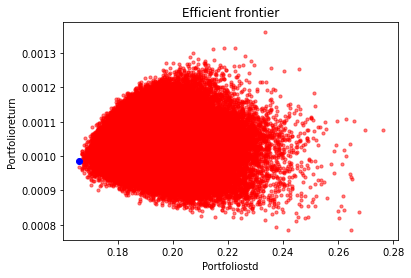

In [15]:
plt.scatter(stds,returns,color="red",s=10, alpha=0.5)
plt.scatter(min(stds),returns[stds.index(min(stds))], c="blue")
plt.title("Efficient frontier")
plt.xlabel("Portfoliostd")
plt.ylabel("Portfolioreturn")
plt.show()

In [31]:
w[stds.index(min(stds))]

array([0.01781192, 0.0316045 , 0.0493349 , 0.18451924, 0.02398626,
       0.03646201, 0.20709772, 0.21599658, 0.20563602, 0.02755085])

,Returns,Volatility
0,0.001076,0.183376
1,0.001170,0.190829
2,0.001030,0.194269
3,0.000973,0.199268
4,0.001027,0.173022
...,...,...
99995,0.001084,0.188778
99996,0.001123,0.193960
99997,0.001092,0.191984
99998,0.000993,0.188075


array([0.01781192, 0.0316045 , 0.0493349 , 0.18451924, 0.02398626,
       0.03646201, 0.20709772, 0.21599658, 0.20563602, 0.02755085])